In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tol_colors as tc # Note: this must first be installed using `pip install tol-colors`

# Generating some data

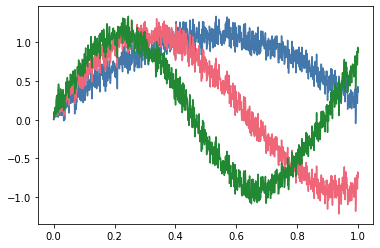

In [30]:
x = np.linspace(0,1, 1000)
noise = np.random.normal(0.1,0.1, len(x))
y1 = np.sin(3*x)+noise
y2 = np.sin(5*x)+noise
y3 = np.sin(7*x)+noise

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)

# Colour-blind friendly line plots
This methodology for plotting below applies for any color scheme but these examples are based on the colour-blind friendly schemes created by Paul Tol. More colour sets can be found [here](https://packages.tesselle.org/khroma/articles/tol.html).



## Categorical colours

In [31]:
# Load a categorical colour set: Bright, vibrant, muted and light have the most colours (between 7 and 9)
# Print help(cset) to get more information about the object
cset = tc.tol_cset('bright')

# Hex-codes accessible through indexing and as class variables
print(cset)
print(cset[0])
print(cset.blue)

bri_cset(blue='#4477AA', red='#EE6677', green='#228833', yellow='#CCBB44', cyan='#66CCEE', purple='#AA3377', grey='#BBBBBB', black='#000000')
#4477AA
#4477AA


### Manual selection

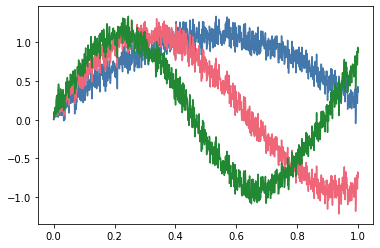

In [32]:
plt.plot(x,y1, color=cset[0])
plt.plot(x,y2, color=cset[1])
plt.plot(x,y3, color=cset[2])
plt.show()

This can also be used in iterative plots:

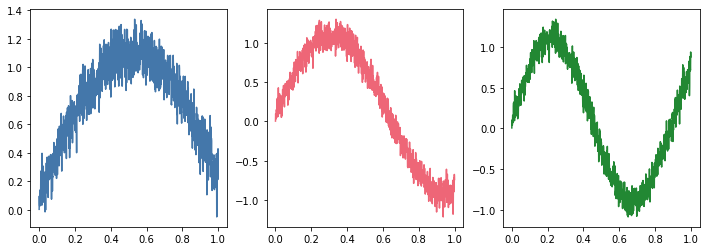

In [33]:
fig, axs = plt.subplots(1,3, figsize=(3*4, 4))
axs = axs.ravel()
data = [y1,y2,y3]

for i, (ax, y) in enumerate(zip(axs, data)):
    ax.plot(x,y, color=cset[i])
plt.show()

Changing the order:

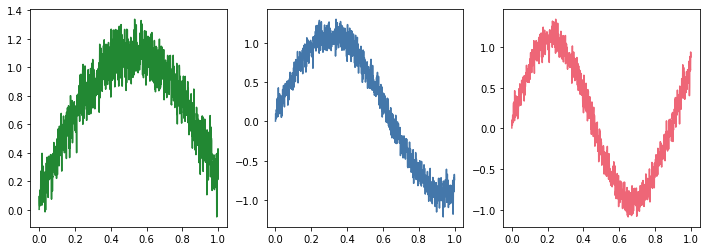

In [34]:
fig, axs = plt.subplots(1,3, figsize=(3*4, 4))
axs = axs.ravel()
data = [y1,y2,y3]

csubset = [
    cset.green,
    cset.blue,
    cset.red
]

for i, (ax, y) in enumerate(zip(axs, data)):
    ax.plot(x,y, color=csubset[i])
plt.show()

### Changing the colour cycler

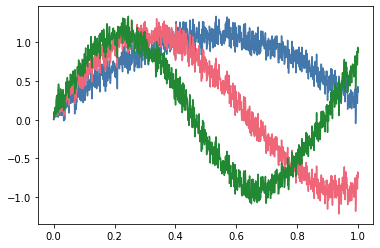

In [35]:
plt.rc('axes', prop_cycle=plt.cycler('color', list(cset)))

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.show()

## Sequential colours
This one is slightly more involved

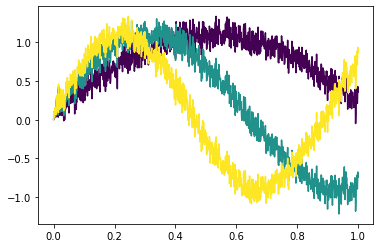

In [36]:
fix, ax = plt.subplots()

# Load the colour map and split it into as many parts as there are lines
n = 3
colours = plt.cm.viridis(np.linspace(0,1,n))

# Proceed with in the same manner as previous
ax.plot(x,y1, color=colours[0])
ax.plot(x,y2, color=colours[1])
ax.plot(x,y3, color=colours[2])
plt.show()

Tweaking the colour-interval:

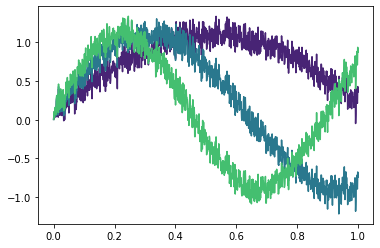

In [37]:
fix, ax = plt.subplots()

# Load the colour map and split it into as many parts as there are lines
n = 3
colours = plt.cm.viridis(np.linspace(0.1,0.7,n))

# Proceed with in the same manner as previous
ax.plot(x,y1, color=colours[0])
ax.plot(x,y2, color=colours[1])
ax.plot(x,y3, color=colours[2])
plt.show()

# Colour-blind friendly density plots

## Scatter
Pyplot natively uses the viridis colourmap so simply feeding densities to the `c` argument in a scatter plot will produce the following:

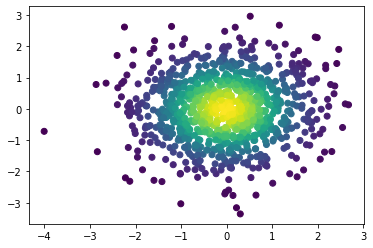

In [38]:
# Generate some artificial data
N = 1000
Y = np.random.normal(0,1, (N,2))
y1, y2 = Y[:,0], Y[:,1]

def Kgauss(x):
    return np.exp(-np.dot(x,x)/2)/(2*np.pi)
	
def gaussian_kde(X, width):
    shift = np.average(X)
    f = np.array([Kgauss((shift-x)/width) for x in X])
    return f/(len(f)*width**2)

dens = gaussian_kde(Y, 1)
plt.scatter(y1,y2, c=dens)
plt.show()

Assigning a colourmap to the argument `cmap` allows one to control the colour scheme:

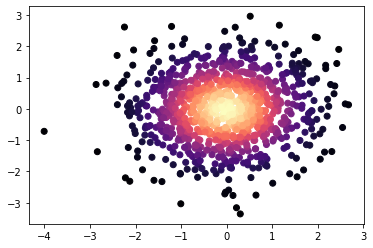

In [39]:
dens = gaussian_kde(Y, 1)
plt.scatter(y1,y2, c=dens, cmap='magma')
plt.show()

256


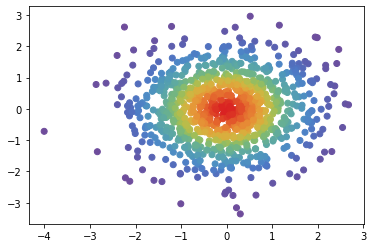

In [40]:
# Load a sequential colour set
cmap = tc.tol_cmap('rainbow')
print(cmap)
print(cmap.N)

dens = gaussian_kde(Y, 1)
plt.scatter(y1,y2, c=dens, cmap=cmap)
plt.show()

## 2D Histrograms
The same goes for 2D histograms:

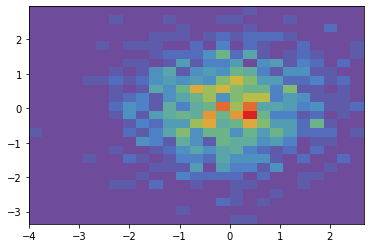

In [41]:
plt.hist2d(y1,y2, cmap=cmap, bins=25)
plt.show()